In [1]:
import pandas as pd
import numpy as np
import os, glob
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

sns.set(style="whitegrid", font_scale=1)

# 11.5 Capstone: EDA

### Load the data 
We will focus on _Hourly Energy Demand_.

In [2]:
## Hourly Energy Demand

fileName_to_load = "data/energy.pkl"
with open(fileName_to_load, 'rb') as fp:
    data = pickle.load(fp)

data.keys()

dict_keys(['with_na', 'fill_na'])

In [3]:
## Data with NaN
energy_data = data['with_na']

## Data after imputing NaN
df = data['fill_na']

In [4]:
display(energy_data.head(5).T)
display(df.head(5).T)

time,2015-01-01 00:00:00+01:00,2015-01-01 01:00:00+01:00,2015-01-01 02:00:00+01:00,2015-01-01 03:00:00+01:00,2015-01-01 04:00:00+01:00
generation biomass,447.00,449.00,448.00,438.00,428.00
generation fossil brown coal/lignite,329.00,328.00,323.00,254.00,187.00
generation fossil gas,4844.00,5196.00,4857.00,4314.00,4130.00
generation fossil hard coal,4821.00,4755.00,4581.00,4131.00,3840.00
generation fossil oil,162.00,158.00,157.00,160.00,156.00
generation hydro pumped storage consumption,863.00,920.00,1164.00,1503.00,1826.00
generation hydro run-of-river and poundage,1051.00,1009.00,973.00,949.00,953.00
generation hydro water reservoir,1899.00,1658.00,1371.00,779.00,720.00
generation nuclear,7096.00,7096.00,7099.00,7098.00,7097.00
generation other,43.00,43.00,43.00,43.00,43.00


time,2015-01-01 00:00:00+01:00,2015-01-01 01:00:00+01:00,2015-01-01 02:00:00+01:00,2015-01-01 03:00:00+01:00,2015-01-01 04:00:00+01:00
generation biomass,447.00,449.00,448.00,438.00,428.00
generation fossil brown coal/lignite,329.00,328.00,323.00,254.00,187.00
generation fossil gas,4844.00,5196.00,4857.00,4314.00,4130.00
generation fossil hard coal,4821.00,4755.00,4581.00,4131.00,3840.00
generation fossil oil,162.00,158.00,157.00,160.00,156.00
generation hydro pumped storage consumption,863.00,920.00,1164.00,1503.00,1826.00
generation hydro run-of-river and poundage,1051.00,1009.00,973.00,949.00,953.00
generation hydro water reservoir,1899.00,1658.00,1371.00,779.00,720.00
generation nuclear,7096.00,7096.00,7099.00,7098.00,7097.00
generation other,43.00,43.00,43.00,43.00,43.00


In [5]:
display(energy_data.info())
display(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 20 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35045 non-null  float64
 1   generation fossil brown coal/lignite         35046 non-null  float64
 2   generation fossil gas                        35046 non-null  float64
 3   generation fossil hard coal                  35046 non-null  float64
 4   generation fossil oil                        35045 non-null  float64
 5   generation hydro pumped storage consumption  35045 non-null  float64
 6   generation hydro run-of-river and poundage   35045 non-null  float64
 7   generation hydro water reservoir             35046 non-null  float64
 8   generation nuclear                           35047 non-null  float64
 9   generation other         

None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 20 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35064 non-null  float64
 1   generation fossil brown coal/lignite         35064 non-null  float64
 2   generation fossil gas                        35064 non-null  float64
 3   generation fossil hard coal                  35064 non-null  float64
 4   generation fossil oil                        35064 non-null  float64
 5   generation hydro pumped storage consumption  35064 non-null  float64
 6   generation hydro run-of-river and poundage   35064 non-null  float64
 7   generation hydro water reservoir             35064 non-null  float64
 8   generation nuclear                           35064 non-null  float64
 9   generation other         

None

In [6]:
display(energy_data.describe().T)  # it has NaN.
display(df.describe().T) # no missing values

# Differences between the two
#display( (energy_data.describe().T - df.describe().T)/energy_data.describe().T)

,count,mean,std,min,25%,50%,75%,max
generation biomass,35045.0,383.513540,85.353943,0.00,333.0000,367.00,433.00,592.00
generation fossil brown coal/lignite,35046.0,448.059208,354.568590,0.00,0.0000,509.00,757.00,999.00
generation fossil gas,35046.0,5622.737488,2201.830478,0.00,4126.0000,4969.00,6429.00,20034.00
generation fossil hard coal,35046.0,4256.065742,1961.601013,0.00,2527.0000,4474.00,5838.75,8359.00
generation fossil oil,35045.0,298.319789,52.520673,0.00,263.0000,300.00,330.00,449.00
generation hydro pumped storage consumption,35045.0,475.577343,792.406614,0.00,0.0000,68.00,616.00,4523.00
generation hydro run-of-river and poundage,35045.0,972.116108,400.777536,0.00,637.0000,906.00,1250.00,2000.00
generation hydro water reservoir,35046.0,2605.114735,1835.199745,0.00,1077.2500,2164.00,3757.00,9728.00
generation nuclear,35047.0,6263.907039,839.667958,0.00,5760.0000,6566.00,7025.00,7117.00
generation other,35046.0,60.228585,20.238381,0.00,53.0000,57.00,80.00,106.00


,count,mean,std,min,25%,50%,75%,max
generation biomass,35064.0,383.531343,85.346266,0.00,333.0000,367.00,433.00,592.00
generation fossil brown coal/lignite,35064.0,448.094570,354.618269,0.00,0.0000,509.00,757.00,999.00
generation fossil gas,35064.0,5622.700647,2201.510984,0.00,4126.0000,4969.50,6429.00,20034.00
generation fossil hard coal,35064.0,4256.531271,1961.988937,0.00,2527.0000,4475.00,5839.00,8359.00
generation fossil oil,35064.0,298.342417,52.519927,0.00,263.0000,300.00,330.00,449.00
generation hydro pumped storage consumption,35064.0,475.582706,792.312704,0.00,0.0000,68.00,616.00,4523.00
generation hydro run-of-river and poundage,35064.0,972.201902,400.712304,0.00,637.0000,906.00,1250.00,2000.00
generation hydro water reservoir,35064.0,2605.534123,1835.175078,0.00,1078.0000,2165.00,3758.00,9728.00
generation nuclear,35064.0,6263.483430,840.272333,0.00,5759.0000,6564.00,7025.00,7117.00
generation other,35064.0,60.226030,20.238792,0.00,53.0000,57.00,80.00,106.00


Add new features `total generation`

In [7]:
## Add new features
col_gen = df.columns[df.columns.str.contains('generation')]
df['total generation'] = df[col_gen].sum(axis=1)

### Distributions of Feature Values

In [8]:
# energy_data.hist(figsize=(18, 10))
# plt.subplots_adjust(hspace=0.5);
# plt.show()

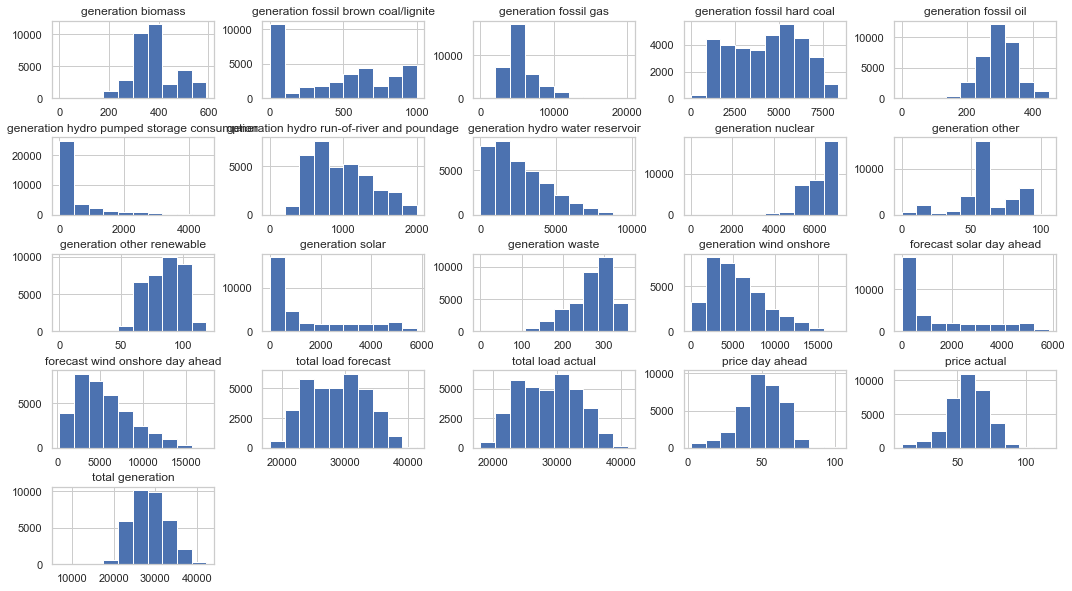

In [9]:
df.hist(figsize=(18, 10))
plt.subplots_adjust(hspace=0.5);
plt.show()

### Feature summary statistics versus time

In [10]:
# df['Month'] = df.index.to_period('M')
# monthly_avg = df.groupby('Month').mean().reset_index()
# monthly_median = df.groupby('Month').median().reset_index()
# monthly_std = df.groupby('Month').std().reset_index()

In [11]:
# Monthly avg. over time
#_ = monthly_avg.plot(x="Month", figsize=(8,15),subplots=True)

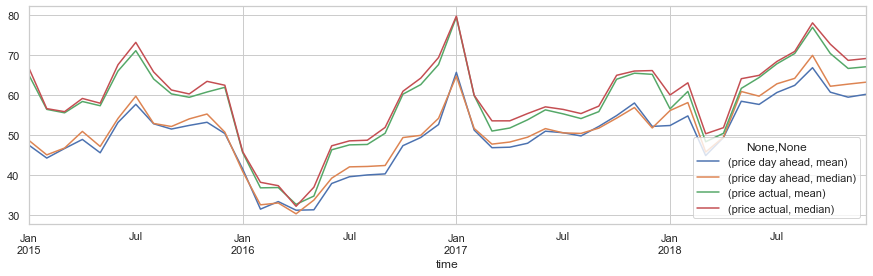

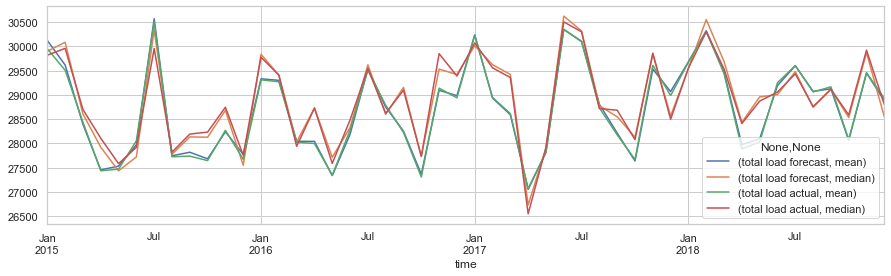

In [12]:
_ = df[['price day ahead','price actual']].resample("1m").agg([np.mean, np.median]).plot(figsize=(15,4))
_ = df[['total load forecast', 'total load actual']].resample("1m").agg([np.mean, np.median]).plot(figsize=(15,4))

In [13]:
df.columns


Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'total generation'],
      dtype='object')

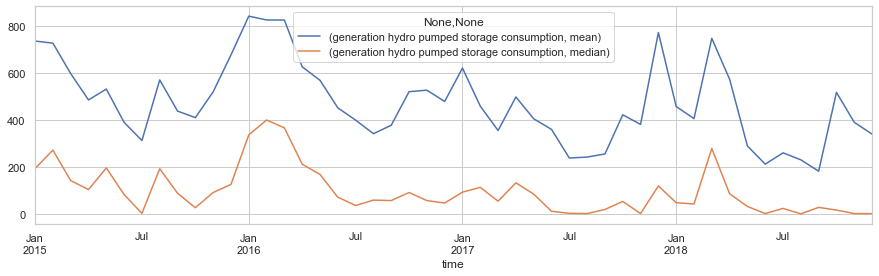

In [14]:
_ = df[['generation hydro pumped storage consumption']].resample("1m").agg([np.mean, np.median]).plot(figsize=(15,4))

In [27]:
import scipy.stats as stats

In [28]:
df_z_score = df.copy()
df_z_score.loc[:,:] = stats.zscore(df_z_score, axis=0, ddof=1)



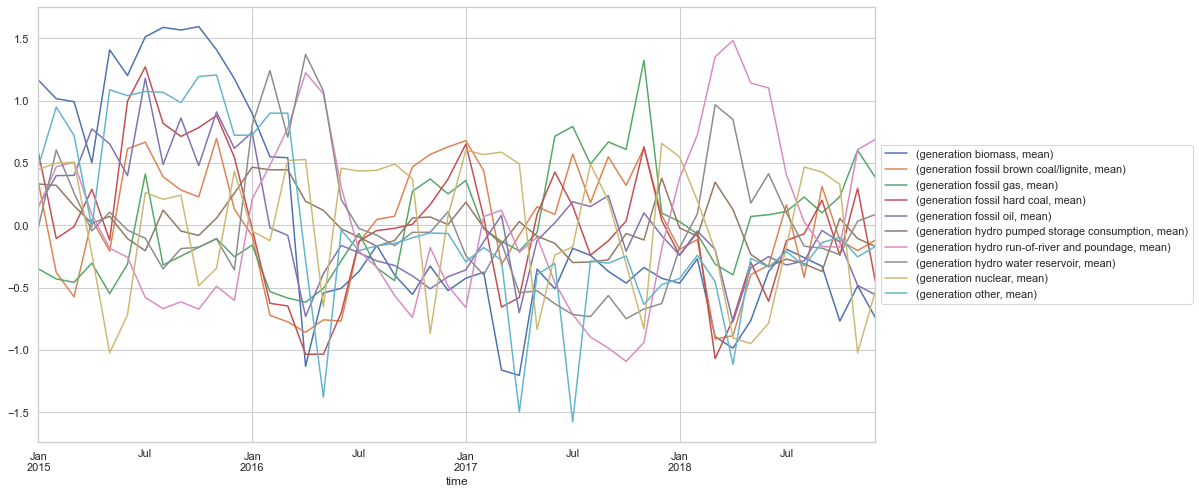

In [29]:
df_z_score.iloc[:,:10].resample("1m").agg([np.mean]).plot(figsize=(15, 8))

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Pearson correlation coefficients

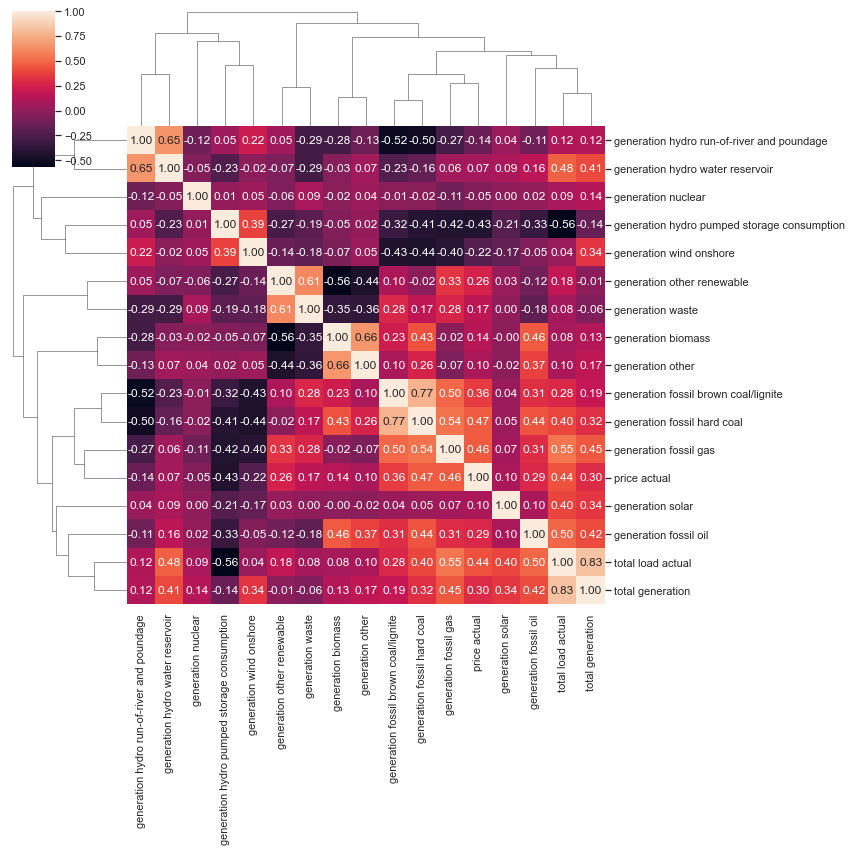

In [15]:
## Pearson correlation coefficients
sub_col = df.columns[~df.columns.str.contains(
    'total load forecast|price day ahead|forecast solar day ahead|forecast wind onshore day ahead')]

_ = sns.clustermap(df[sub_col].corr(), figsize=(12, 12), annot=True, fmt='.2f')

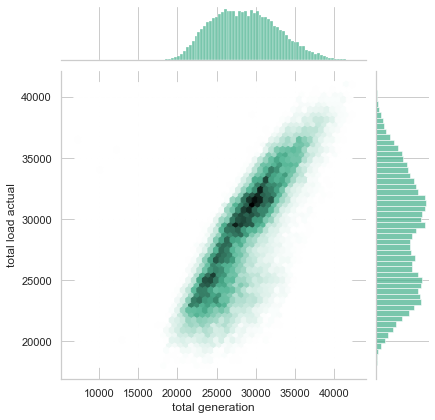

In [30]:
# sub_col = ['generation biomass', 'generation fossil brown coal/lignite',
#        'generation fossil gas', 'generation fossil hard coal',
#        'generation fossil oil', 'generation hydro pumped storage consumption',
#        'generation hydro run-of-river and poundage',
#        'generation hydro water reservoir', 'generation nuclear',
#        'generation other', 'generation other renewable', 'generation solar',
#        'generation waste', 'generation wind onshore']

sns.jointplot(x='total generation',
              y='total load actual',
              data=df,
              kind="hex",
              color="#4CB391")
plt.show()

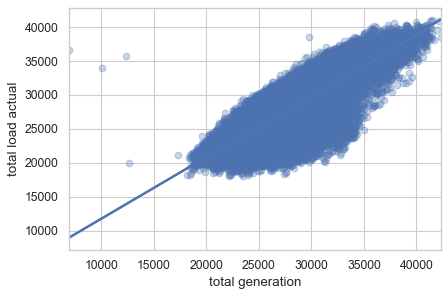

In [21]:
# Call the regplot method on your sns object, with parameters: x = 'total generation', y = 'total load actual'

fig, ax = plt.subplots(dpi=80)
sns.regplot(x='total generation',y='total load actual',data=df, scatter_kws={'alpha':0.3})
plt.show()

### Autocorrelation plot

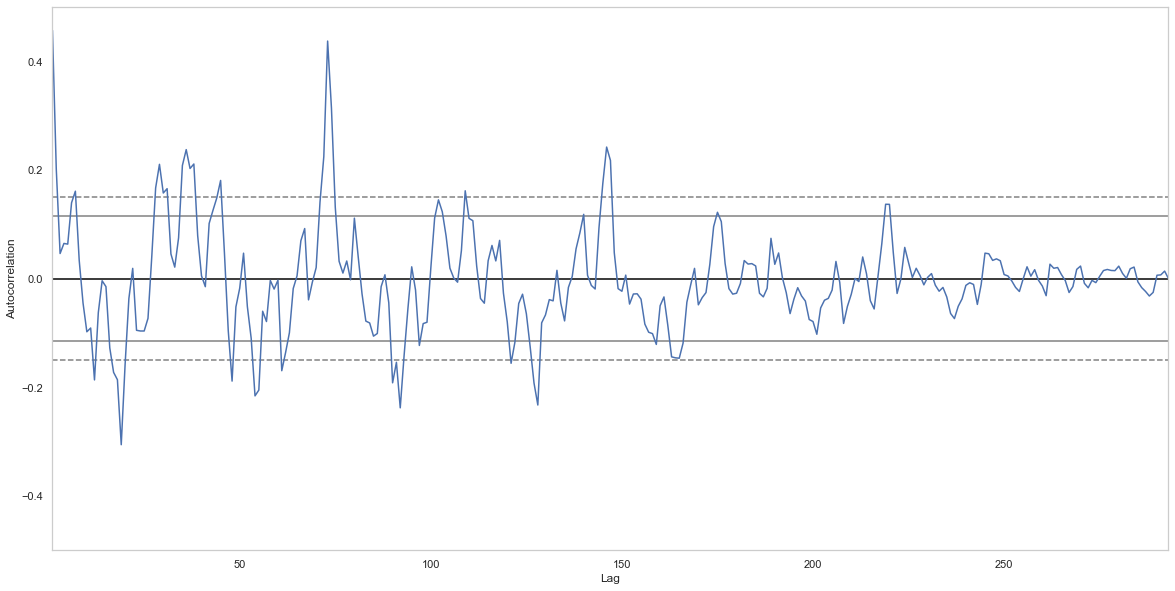

In [26]:
# Creating Autocorrelation plot
plt.figure(figsize=(20, 10))    
x = pd.plotting.autocorrelation_plot(df['total load actual'].resample("5d").agg([np.mean]))
 
# ploting the Curve
x.plot()
plt.ylim([-0.5,0.5])
  
# Display
plt.show()